# Predicting Kobe Bryant Shot Selection

Motivation: [Kaggle's Kobe Bryant Shot Selection](https://www.kaggle.com/c/kobe-bryant-shot-selection)

This this notebook we will be analyzing the consistency of Kobe Bryant's Career. We will be using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

![](https://pbs.twimg.com/media/Dcso-I3V4AA0H2X.jpg)

On December 18, 2017, The Los Angeles Lakers retired both the number 8 and number 24. These numbers belong to the one, the only, __Kobe Bean Bryant__. Kobe Bryant successfully conquered his journey in 20 seasons in the NBA. For ten years he wore the number 8 and the other ten he wore the number 24.




-----

## Import, Data Load and Examination

In [119]:
import pandas as pd
import numpy as np

# Display up to 25 columns of a dataframe
pd.set_option('display.max_columns', 30)

# visualizations
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")
import matplotlib.pyplot as plt

In [102]:
kobe = pd.read_csv('data.csv')
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [103]:
kobe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

Data Quality Check - lets check the columns that contain `NaN` values.

In [104]:
kobe.columns[kobe.isnull().any()].tolist()

['shot_made_flag']

In [105]:
kobe = kobe[kobe['shot_made_flag'].notnull()]
kobe.columns[kobe.isnull().any()].tolist()

[]

--------
##  Exploratory Analysis

In [6]:
kobe.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


Starting off let just get a perspective of some basic stats.. the distribution between whether kobe made a shot or missed a shot. below and throughout the rest of the exploritory section we will use `seaborn` as our data visualization library (which is based on `matplotlib`) that, in my perspective, provide a better interface for some really neat graphs for statistical data. 

shot_made_flag
0.0    14232
1.0    11465
dtype: int64


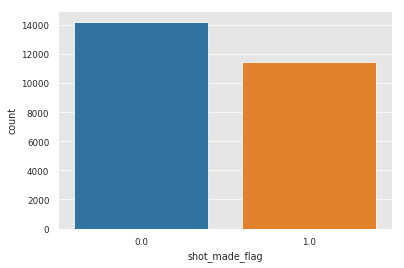

In [9]:
sns.countplot(kobe['shot_made_flag'], label="Count")
print(kobe.groupby('shot_made_flag').size())

Next let see the distirbution of kobe's `shot zone` _(where kobe shot the ball on the court)_ and the number of time he made or missed the shot.

['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']


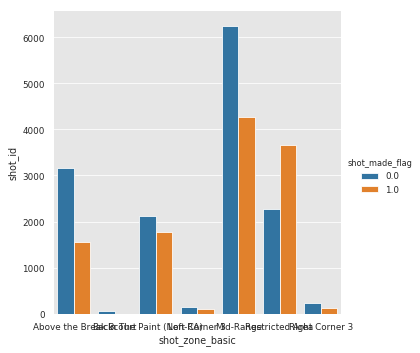

In [91]:
print(kobe.shot_zone_basic.unique())
sns.catplot(x='shot_zone_basic', y='shot_id',
            hue='shot_made_flag', kind='bar',
           data=kobe.groupby(['shot_zone_basic','shot_made_flag'])['shot_id'].count().reset_index())\


#### Distribution of observatios within the shots made category
Below we we summarize the distribution of shots made by using a box plot which facilitates easy comparisions across the `combined shot type` category to see the distribution of `shots_made_flag`. 

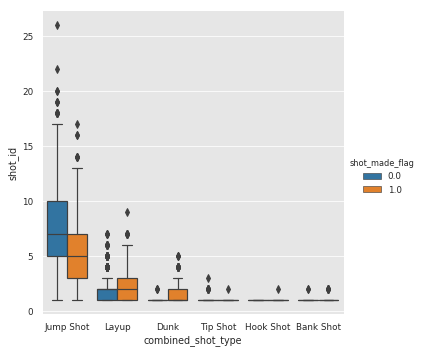

In [85]:
sns.catplot(x='combined_shot_type', y='shot_id', hue='shot_made_flag',kind='box', data=kobe.groupby(['game_date','combined_shot_type','shot_made_flag'])['shot_id'].count().reset_index())

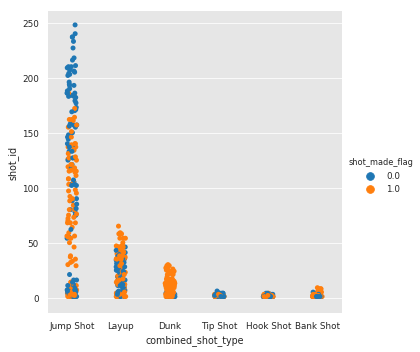

In [60]:
sns.catplot(x='combined_shot_type', y='shot_id', hue='shot_made_flag', data=kobe.groupby(['season','period','combined_shot_type','shot_made_flag'])['shot_id'].count().reset_index())

Next we look at the distribution of kobe's shot using `catplot`'s `FacetGrid` which we can used to easily add faceting variables to fisualize higher dimensional relationships. We will use this to show Kobe's shot selection in aggregation by `season` showing the `combined shot category` according to whether he made or missed the shot. 

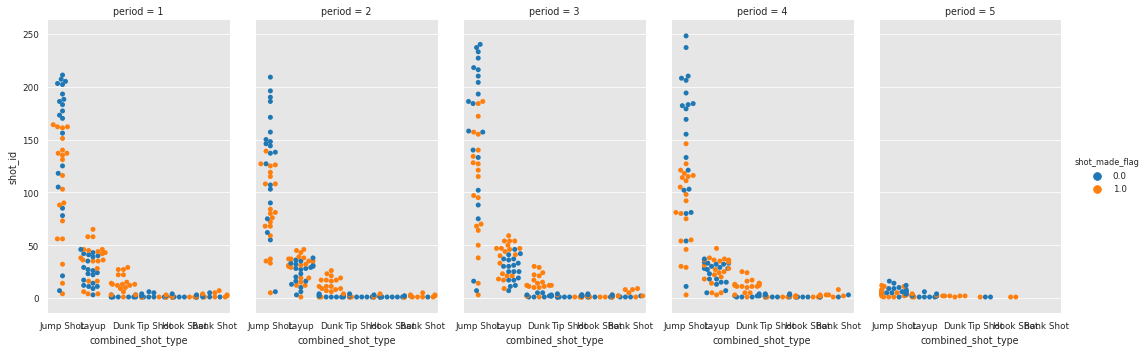

In [62]:
sns.catplot(x="combined_shot_type", y="shot_id", hue="shot_made_flag",
            col="period", aspect=.6,
            kind="swarm", 
            data=kobe[kobe.period <=5].groupby(['season','period','combined_shot_type','shot_made_flag'])['shot_id'].count().reset_index())

Next we will use a `point plot` which is an alternative style for visualizing the same information above but in a way that encodes the value of the `shot made flag` that has a bar to plot point esitmates and confidence intervals. Using the `hue` category, we are able to visualize the `combined_shot_type` category. This makes it easy to see how the main relationship is changin as a functino of the hue semantic.  

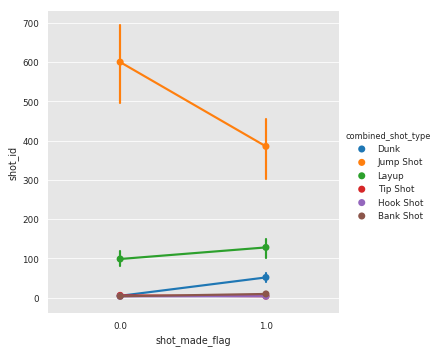

In [40]:
sns.catplot(x='shot_made_flag', y='shot_id', 
            hue='combined_shot_type', kind='point',
            data=kobe.groupby(['season','combined_shot_type','shot_made_flag'])['shot_id'].count().reset_index())

From the chart above we can see that still there is a high distributino of the shots Kobe takes as a jump shot compared to the other types of shots he takes. Howver we can see that in some cases (which is slightly surprising) his `layups` were often more accurate than his `dunks`. 

In [93]:
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


----
## Looking for Correlations

Next we use several methods to evaluate the corrletions of the kobe bryant shot selection. Just starting off we can already get a glimps of the relathipships of `season`, `combined_shot_type` and `shot_zone_basic`. Next we will calcuate the correlation for a set of features that we think will have an impact in predicting whether Kobe makes or misses a shot. 

In the past to solve for such correlation, we would have had to bring out the ol' notebook, calculator and pencil. Instead of having to master the original formula _(below)_ for __Pearson Correlation Coefficient__ we can use a couple of functions and in a nic of time we have our results of correlations between different features. 

![https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials](https://render.githubusercontent.com/render/math?math=%5Crho_%7BX%2CY%7D%20%3D%20%5Cfrac%7B%5Csum%28X_i%20-%20%5Cbar%7BX%7D%29%28Y_i%20-%20%5Cbar%7BY%7D%29%7D%7B%5Csqrt%7B%5Csum%28X_i%20-%20%5Cbar%7BX%7D%29%5E2%20%5Csum%28Y_i%20-%5Cbar%7BY%7D%29%5E2%7D%20%7D&mode=display)

However, life isnt always _that_ easy. We will have to know how to interprete the data. So therefore, we must understand Pearsons `p` Correlation Coefficient in some capacity. So lets gets just get some basic level setting so we can get on with the fun.
* __Covariance__ is a statitical measure of associate between two variables `X` and `Y`. Such as given a random defense guarding Kobe, at a random time in the game, at a random location `:X`, if Kobe were to shot the ball, would the result be a make or a miss `:Y` . Essentially the se centered scores are multiplied together to measure twhether the increase in one variable associates with the increase in another. 
* __Pearson Correlation__ measures the linear association between continuous variables. In other words, the coefficient quantifies the degree to which a relationship between two variables can be described by a line. In the formula listed above, basically its read as the raw observations are centered by subtracting their means and rescaled by a measure of standard deviation. 
* __Interpreting the Pearson Correlation Result__ when calculating Pearson Correlation the resulting number you get will ALWAYS be between 1 and -1. 
    * The close the `p` result is to `+1` the more of an `incrase` in one variable associates with an increase in the ovther. 
    * On the other hand, the closer `p` result is to `-1`, the increase in one variable would result in `decrease` in the other. 
    * If the `p` result is close to `0` we can say `X` and `Y` are indepenent (but not vice versa). 

In [94]:
kobe_corr = kobe.corr()
kobe_corr['shot_made_flag'].sort_values(ascending=False)

shot_made_flag       1.000000
lat                  0.148070
seconds_remaining    0.030804
minutes_remaining    0.028342
loc_x               -0.000848
lon                 -0.000848
playoffs            -0.001257
game_id             -0.001612
shot_id             -0.013016
period              -0.032152
game_event_id       -0.037232
loc_y               -0.148070
shot_distance       -0.198242
team_id                   NaN
Name: shot_made_flag, dtype: float64

okay... well we didnt get high indication on correlation just on the dataset which we were given. In cases this this, its best to talk with an individual knowledgeable about the dataset, the area we are evaluating and some awesome feature engineering skills. Good think you came here... lets solve this problem one at a time. 

...We will return to finding correlations... first we need to take a step back and see if we can improve on the set of features we have now...this next step is called feature engineering. 

----

## Feature Engineering

The first feature that come that can assist with predicing kobe's shot is to add a feature _(or column)_ to indicate whether he made or missed his last shot. Make sense right... if we can have prior knowedge if Kobe made or missed his last shot, it can reasonable be an indicator as to whether he will make or miss his current/future shot with some range of standard error. Therefore lets create a column that indicate whether he made or miss his last shot. We can do this by using the `shift` method. We will also have to remove the first colum as it will now contain an `NA`.

#### [FEATURE UPDATE] NEED TO MAKE SURE: current shot and last shot were all in the same period of the same game

In [106]:
kobe['shot_made_prev'] = kobe['shot_made_flag'].shift(1)
kobe.shot_made_prev[1] = 0.0

Next an interesting feature would be to get a better timeline of the game, while we have both `minutes_remaining` and `seconds remaining` these would actually be quite arbitrary to the model if we just fed in directly as indicated by the correlation. it would be true that the correlation of time and shots made should be correlated or at least shot type and time but currently they are broken out in an unuseful format for our model to use effectively. So therefore we will create another timeline to get `secFromGameStart`.

In [116]:
# Thanks: https://www.kaggle.com/selfishgene/psychology-of-a-professional-athlete
kobe['secondsFromPeriodEnd'] = 60*kobe['minutes_remaining']+kobe['seconds_remaining']
kobe['secondsFromPeriodStart'] = 60*(11-kobe['minutes_remaining'])+(60-kobe['seconds_remaining'])
kobe['secondsFromGameStart'] = (kobe['period'] <= 4).astype(int)*(kobe['period']-1)*12*60 + (kobe['period'] > 4).astype(int)*((kobe['period']-4)*5*12*60) + kobe['secondsFromPeriodStart']

In [117]:
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,shot_made_prev,secondsFromPeriodEnd,secondsFromPeriodStart,secondsFromGameStart
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,0.0,622,98,98
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,0.0,465,255,255
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,1.0,412,308,308
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,0.0,379,341,1061
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6,1.0,572,148,1588


Create a `hothand` function to group kobe shots based on the number consecutive shots 

In [ ]:
kobe['hot_hand1'] = kobe['shot_made_flag']

# set all previous misses to -1 for cumsum
kobe['hot_hand']

In [ ]:
def hothand(x):
    if

In [121]:
kobe['shot_made_prev'].diff().ne(0).cumsum()

1            1
2            1
3            2
4            3
5            4
6            5
8            6
9            6
10           7
11           7
12           8
13           8
14           9
15           9
17           9
18          10
20          11
21          11
22          11
23          12
24          12
25          12
26          13
27          13
28          13
29          13
30          13
31          14
38          15
39          16
         ...  
30661    12833
30662    12834
30663    12835
30665    12835
30666    12835
30667    12835
30669    12835
30670    12835
30671    12835
30672    12835
30673    12836
30674    12837
30675    12838
30676    12839
30677    12840
30678    12841
30679    12841
30681    12841
30683    12842
30684    12843
30685    12843
30687    12843
30688    12843
30689    12844
30690    12845
30691    12845
30692    12845
30694    12845
30695    12846
30696    12847
Name: shot_made_prev, Length: 25697, dtype: int64

### References

* [dataset and motivation] [Kaggle's Kobe Bryant Shot Selection](https://www.kaggle.com/c/kobe-bryant-shot-selection)
* [Visualization] [seaborn.pydata categorical documention](https://seaborn.pydata.org/tutorial/categorical.html?highlight=color%20bar)
* [Pearson Correlation] [datascience - intro to correlation](https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials)


